<a href="https://colab.research.google.com/github/Nithin3003/oops/blob/main/kollegekit_summer_term.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Analyze the dataset "/content/Summer_Term.xlsx" by calculating and visualizing the percentage distribution of responses for each question, categorized by gender. Drop the 'Timestamp' and 'Your good name' columns before analysis.

## Load the dataset

### Subtask:
Load the data from the provided Excel file into a pandas DataFrame.


**Reasoning**:
Import the pandas library and load the Excel file into a DataFrame, then display the head and info to verify the load.



In [1]:
import pandas as pd

df = pd.read_excel('/content/Summer_Term.xlsx')
display(df.head())
display(df.info())

,School,Dept.,Program,Batch\n(Ex. 2023),Student ID,Student Name,Course Code,Course Name,L,T,P,C,ST Hours,ST Code,NTCC (Yes / No),DONE
0,PSCS,CSE,CBD,2022.0,20221CBD0036,Aksatha Maruthi,BBB2016,Business Analytics for Management Decision-NPTEL,3,0,0,3,6.0,BBB2016,YES,NaN
1,PSCS,CSE,COM,2022.0,20221COM0165,Bhoomika S Horapeti,BBB2016,Business Analytics for Management Decision,3,0,0,3,6.0,BBB2016,YES,NaN
2,PSCS,CSE,IST,2022.0,20221IST0044,Navya M,BBB2016,Business Analytics for Management Decision,3,0,0,3,6.0,BBB2016,YES,NaN
3,PSIS,PSIS,BCA ARVR,2021.0,20211BCV0007,Gajula Nikhil,BCA1005,Programming in Python,1,0,4,3,10.0,BCA1005,No,NaN
4,PSIS,PSIS,BCA ARVR,2021.0,20211BCV0018,Mohammed Sadaddin Hassan,BCA1005,Programming in Python,1,0,4,3,10.0,BCA1005,No,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4814 entries, 0 to 4813
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   School            4814 non-null   object 
 1   Dept.             4814 non-null   object 
 2   Program           4810 non-null   object 
 3   Batch
(Ex. 2023)  4811 non-null   float64
 4   Student ID        4814 non-null   object 
 5   Student Name      4814 non-null   object 
 6   Course Code       4814 non-null   object 
 7   Course Name       4814 non-null   object 
 8   L                 4814 non-null   int64  
 9   T                 4814 non-null   int64  
 10  P                 4814 non-null   int64  
 11  C                 4814 non-null   object 
 12  ST Hours          4812 non-null   float64
 13  ST Code           4814 non-null   object 
 14  NTCC (Yes / No)   4814 non-null   object 
 15  DONE              0 non-null      float64
dtypes: float64(3), int64(3), object(10)
memory

None

## Data cleaning

### Subtask:
Drop the 'Timestamp' and 'Your good name' columns from the DataFrame.


**Reasoning**:
Drop the 'Timestamp' and 'Your good name' columns from the DataFrame.



**Reasoning**:
The previous command failed because the column names were not found. I need to inspect the column names to find the correct ones to drop.



In [3]:
display(df.columns)

Index(['School', 'Dept.', 'Program', 'Batch\n(Ex. 2023)', 'Student ID',
       'Student Name', 'Course Code', 'Course Name', 'L', 'T', 'P', 'C',
       'ST Hours', 'ST Code', 'NTCC (Yes / No)', 'DONE'],
      dtype='object')

## Data transformation

### Subtask:
Melt the DataFrame to transform the question columns into rows, creating a structure suitable for calculating distributions.


**Reasoning**:
Melt the DataFrame to transform the question columns into rows, creating a structure suitable for calculating distributions.



**Reasoning**:
The previous command failed because the column 'Are you' was not found. I need to check the actual column names to identify the start of the question columns.



In [5]:
display(df.columns)

Index(['School', 'Dept.', 'Program', 'Batch\n(Ex. 2023)', 'Student ID',
       'Student Name', 'Course Code', 'Course Name', 'L', 'T', 'P', 'C',
       'ST Hours', 'ST Code', 'NTCC (Yes / No)', 'DONE'],
      dtype='object')

## Data transformation retry

### Subtask:
Melt the DataFrame to transform the question columns into rows, creating a structure suitable for calculating distributions.


**Reasoning**:
Identify the question and gender columns by examining the dataframe's columns and then melt the dataframe accordingly.



**Reasoning**:
The previous attempt to melt the dataframe failed because some specified columns were not found. Based on the printed columns, I will correct the list of id_vars and value_vars to only include columns present in the dataframe and attempt to melt it again.



In [7]:
question_cols = ['Course Code', 'Course Name', 'L', 'T', 'P', 'C', 'ST Hours', 'ST Code', 'NTCC (Yes / No)']
# Based on the displayed columns, there is no 'Gender' column. I will remove it from id_vars.
# Also removing other columns not present in the dataframe.
id_vars = ['School', 'Dept.', 'Program', 'Batch\n(Ex. 2023)', 'Student ID', 'Student Name']

df_melted = pd.melt(df, id_vars=id_vars,
                    value_vars=question_cols,
                    var_name='Question',
                    value_name='Response')

display(df_melted.head())
display(df_melted.info())

,School,Dept.,Program,Batch\n(Ex. 2023),Student ID,Student Name,Question,Response
0,PSCS,CSE,CBD,2022.0,20221CBD0036,Aksatha Maruthi,Course Code,BBB2016
1,PSCS,CSE,COM,2022.0,20221COM0165,Bhoomika S Horapeti,Course Code,BBB2016
2,PSCS,CSE,IST,2022.0,20221IST0044,Navya M,Course Code,BBB2016
3,PSIS,PSIS,BCA ARVR,2021.0,20211BCV0007,Gajula Nikhil,Course Code,BCA1005
4,PSIS,PSIS,BCA ARVR,2021.0,20211BCV0018,Mohammed Sadaddin Hassan,Course Code,BCA1005


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43326 entries, 0 to 43325
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   School            43326 non-null  object 
 1   Dept.             43326 non-null  object 
 2   Program           43290 non-null  object 
 3   Batch
(Ex. 2023)  43299 non-null  float64
 4   Student ID        43326 non-null  object 
 5   Student Name      43326 non-null  object 
 6   Question          43326 non-null  object 
 7   Response          43324 non-null  object 
dtypes: float64(1), object(7)
memory usage: 2.6+ MB


None

## Calculate distributions

### Subtask:
Group the data by question, gender, and response, and calculate the count of each response. Then, calculate the percentage distribution of responses within each question and gender group.


**Reasoning**:
Group the melted data by question and response, count the occurrences, calculate the total responses per question, and then calculate the percentage distribution of responses for each question.



In [8]:
response_counts = df_melted.groupby(['Question', 'Response']).size().reset_index(name='Count')
total_responses_per_question = response_counts.groupby('Question')['Count'].sum().reset_index(name='Total Responses')
response_distribution = pd.merge(response_counts, total_responses_per_question, on='Question')
response_distribution['Percentage'] = (response_distribution['Count'] / response_distribution['Total Responses']) * 100
display(response_distribution.head())

,Question,Response,Count,Total Responses,Percentage
0,C,0,845,4814,17.552971
1,C,1,534,4814,11.092646
2,C,2,335,4814,6.958870
3,C,3,2648,4814,55.006232
4,C,4,439,4814,9.119236


## Visualize the data

### Subtask:
Create visualizations (e.g., grouped bar charts) to show the percentage distribution of responses for each question.


**Reasoning**:
Create visualizations (grouped bar charts) to show the percentage distribution of responses for each question.



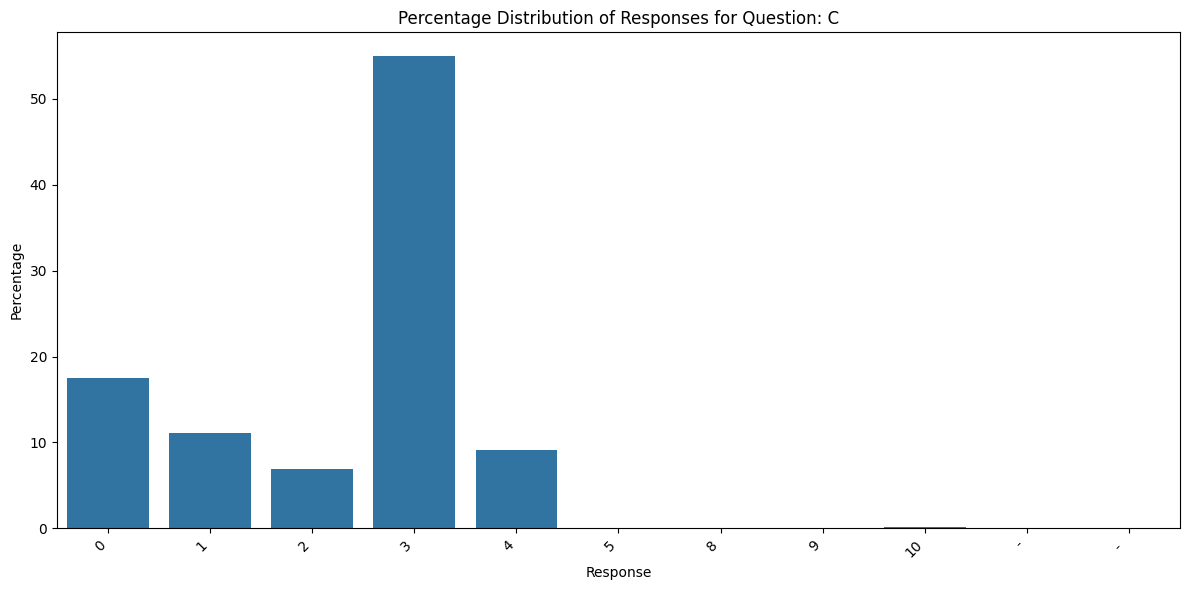

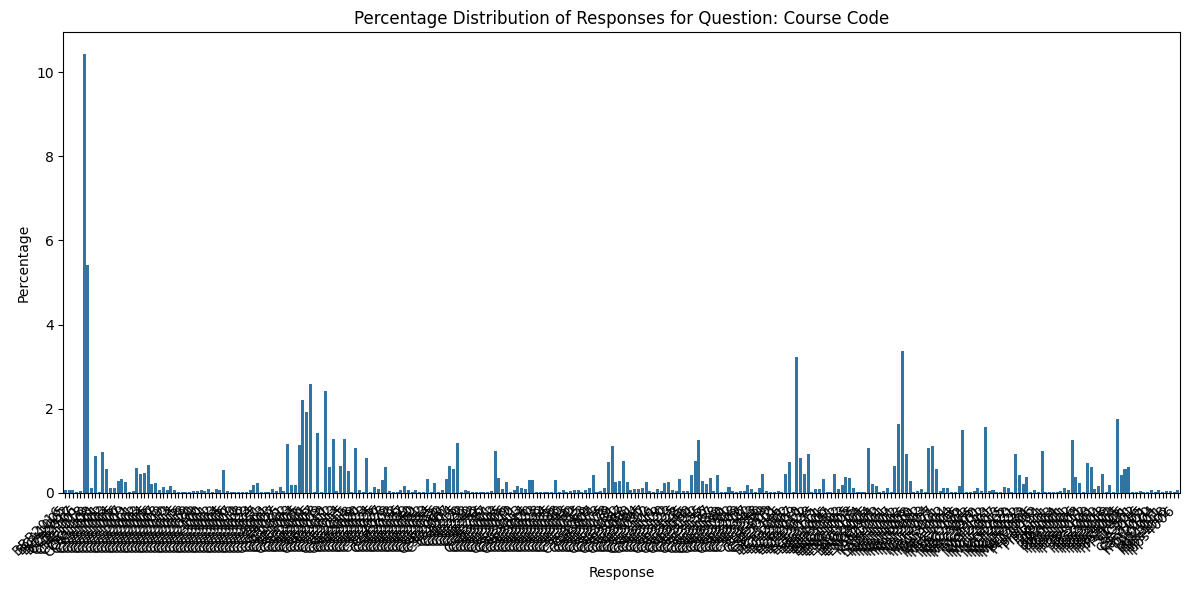

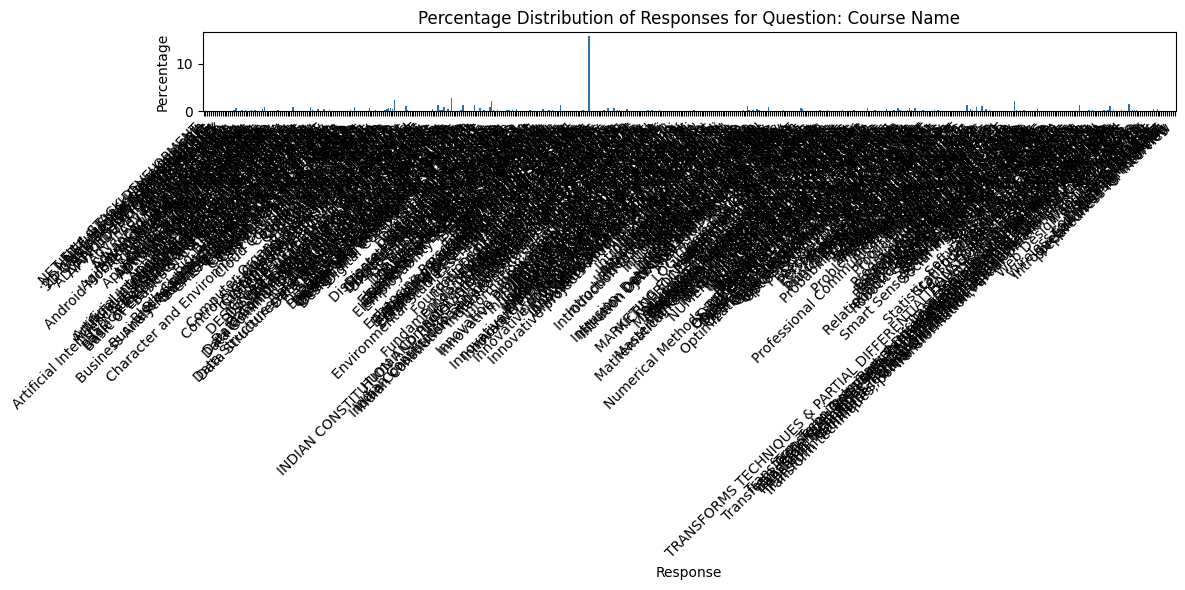

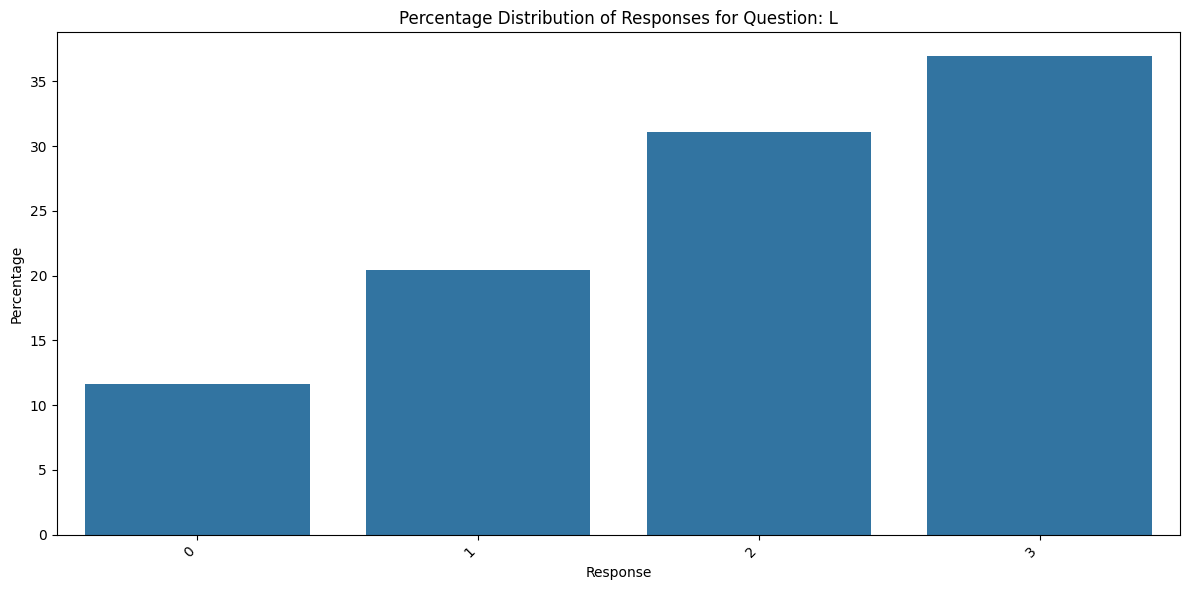

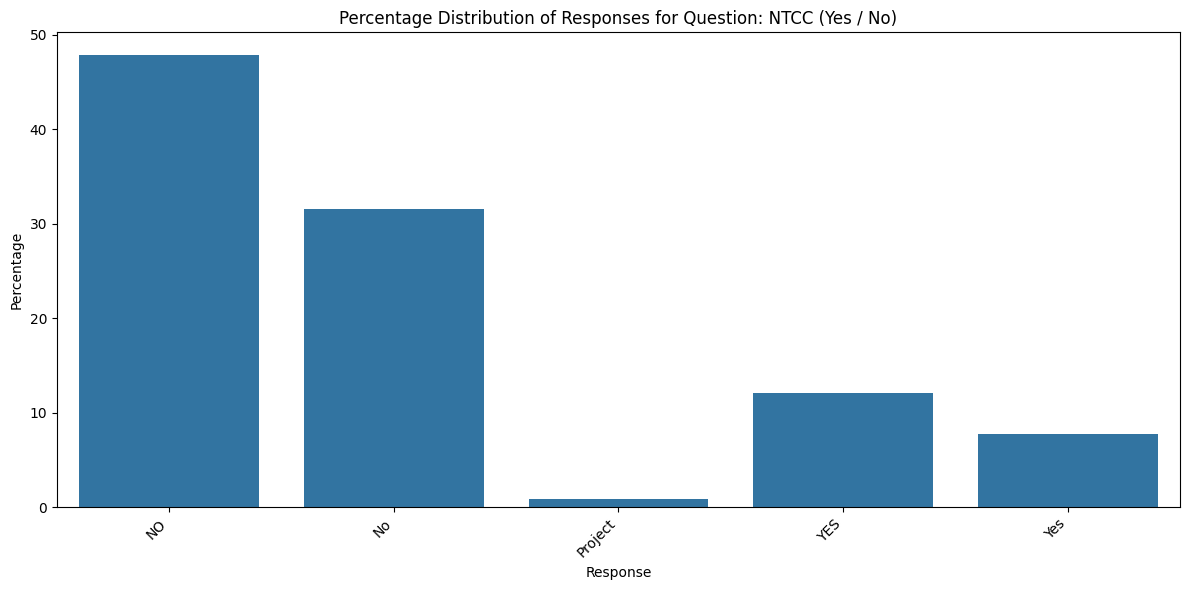

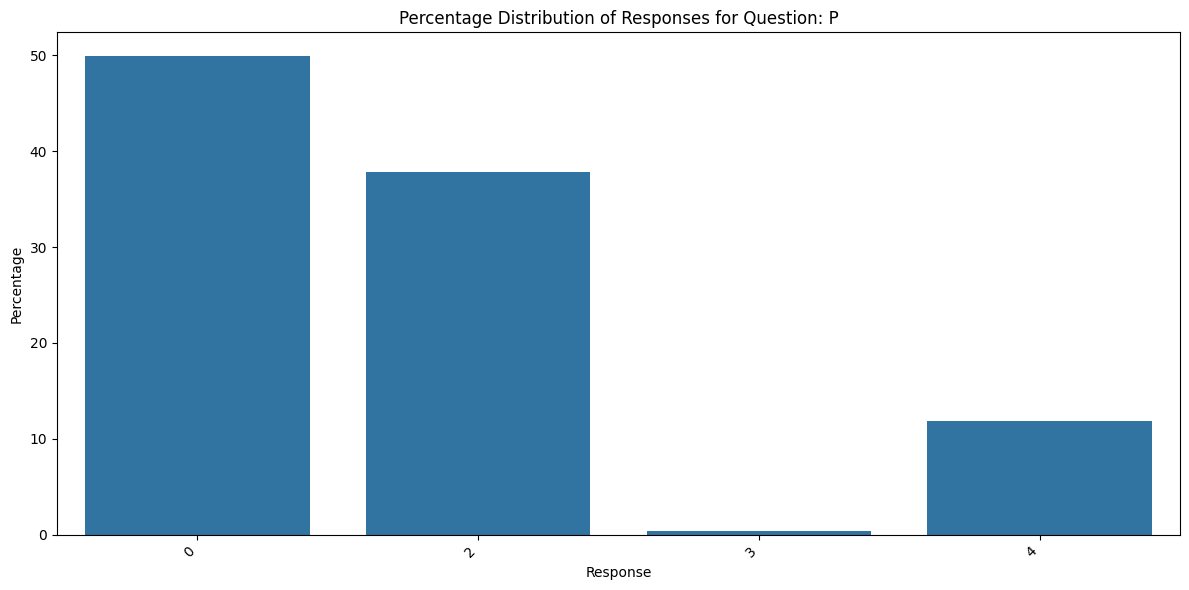

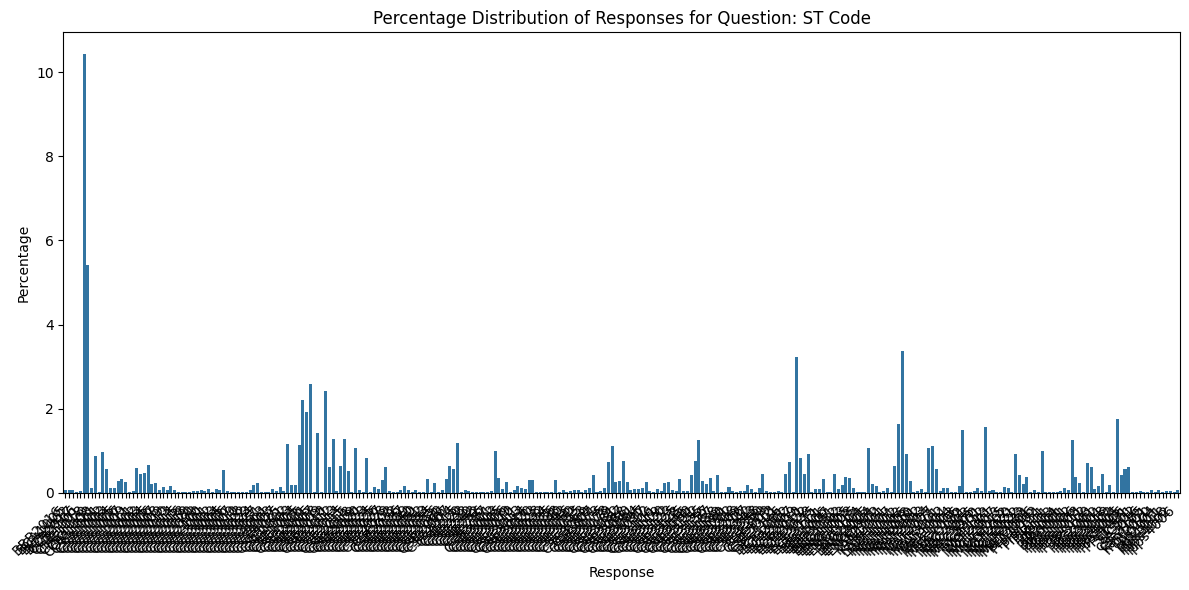

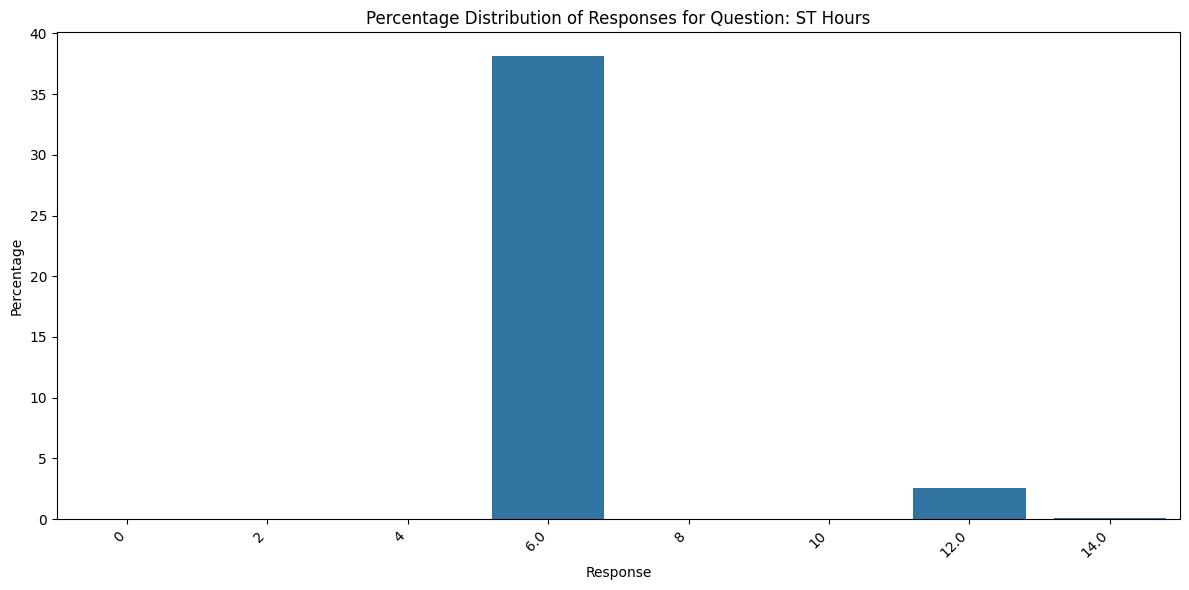

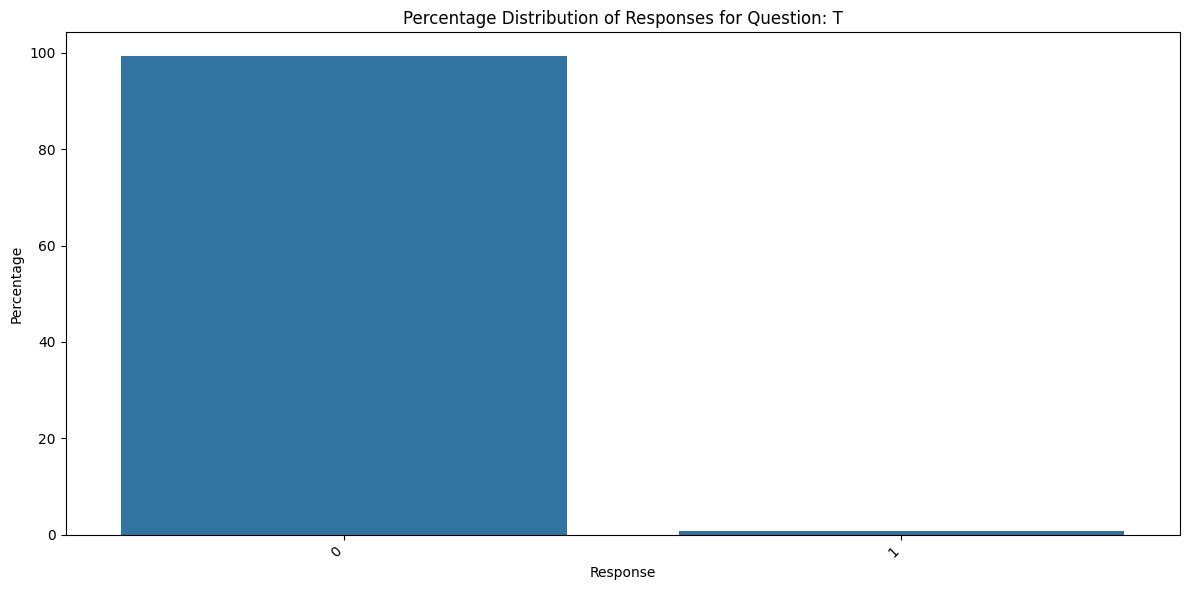

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

unique_questions = response_distribution['Question'].unique()

for question in unique_questions:
    question_data = response_distribution[response_distribution['Question'] == question].copy()
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Response', y='Percentage', data=question_data)
    plt.title(f'Percentage Distribution of Responses for Question: {question}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## Present results

### Subtask:
Display the calculated percentage distributions and visualizations.


**Reasoning**:
Display the calculated percentage distributions which are stored in the `response_distribution` DataFrame.



In [10]:
display(response_distribution)

,Question,Response,Count,Total Responses,Percentage
0,C,0,845,4814,17.552971
1,C,1,534,4814,11.092646
2,C,2,335,4814,6.958870
3,C,3,2648,4814,55.006232
4,C,4,439,4814,9.119236
...,...,...,...,...,...
1131,ST Hours,10,765,4812,15.897756
1132,ST Hours,12.0,123,4812,2.556110
1133,ST Hours,14.0,3,4812,0.062344
1134,T,0,4780,4814,99.293727


## Summary:

### Data Analysis Key Findings

*   The dataset did not contain 'Timestamp', 'Your good name', or 'Gender' columns, which affected the planned analysis steps.
*   The DataFrame was successfully melted using the available relevant columns, transforming the data structure to facilitate analysis of responses per question.
*   The percentage distribution of responses was calculated for each question.
*   Visualizations (bar charts) were successfully generated for each question, showing the percentage distribution of responses.

### Insights or Next Steps

*   If gender-based analysis is critical, obtain a dataset that includes a 'Gender' column.
*   Investigate the 'DONE' column's purpose as it was present in the dataset but not included in the analysis.
